In [1]:
import pandas as pd
from pandas import DataFrame
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_pickle('.././data/pickle/pypf_prep.pkl') # load data

In [3]:
df = df[df['Agegroup'] != 'ALL AGES'] # lets throw away all ages rows 

# df = df[df['Agegroup'] != 'UNDER 25'] # lets throw away age extreams

# df = df[df['Agegroup'] != '85+'] # lets throw away age extreams


agemidpoint = {'ALL AGES': 100, 'UNDER 25': 20, '25-34':30, '35-44':40, 
               '45-54':50, '55-64':60, '65-74':70, '75-84':80, '85+':90}

df['Agemidpoint'] = df.Agegroup.map(lambda x: agemidpoint.get(x)) # lets give everyone an age mid point
df['YearOfDeath'] = df.Year.map(lambda x: x.year)
df['dob'] = df['YearOfDeath'] - df['Agemidpoint'] # dob is appoximately year of death - age midpoint
df['birthcohort'] = pd.cut(df.dob, range(1880,2010,10), 
                           labels=['1880-1889', '1890-1899', '1900-1909', '1910-1919', 
                                   '1920-1929','1930-1939','1940-1949','1950-1959',
                                   '1960-1969', '1970-1979', '1980-1989', '1990-1999'],
                          right=False) # add birth cohorts
df['Rate per million population'] = df['Rate per 100,000 population'] * 10


In [48]:
mask = {}
mask['male-ipf-cohort-1900-1960'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'IPF') & (df['birthcohort'] < '1960-1969') & (df['birthcohort'] > '1890-1899')")
mask['female-ipf-cohort-1900-1960'] = eval("(df['Sex'] == 'Female') & (df['Cause'] == 'IPF') & (df['birthcohort'] < '1960-1969') & (df['birthcohort'] > '1890-1899')")

mask['male-ipf-cohort'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'IPF') & (df['birthcohort'] < '1980-1989')")
mask['female-ipf-cohort'] = eval("(df['Sex'] == 'Female') & (df['Cause'] == 'IPF') & (df['birthcohort'] < '1980-1989')")
mask['malefemale-ipf-cohort'] = eval("(df['Cause'] == 'IPF') & (df['birthcohort'] < '1980-1989')")

mask['male-ipf-cohort-pre-1940'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'IPF') & (df['birthcohort'] < '1940-1949')")
mask['female-ipf-cohort-pre-1940'] = eval("(df['Sex'] == 'Female') & (df['Cause'] == 'IPF') & (df['birthcohort'] < '1940-1949')")
mask['malefemale-ipf-cohort-1900-1960'] = eval("(df['Cause'] == 'IPF') & (df['birthcohort'] < '1960-1969') & (df['birthcohort'] > '1890-1899')")

mask['male-meso-cohort-1900-1960'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'All Mesothelioma') & (df['birthcohort'] < '1960-1969') & (df['birthcohort'] > '1890-1899')")
mask['male-meso-cohort'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'All Mesothelioma') & (df['birthcohort'] < '1980-1989')")
mask['male-meso-cohort-pre-1940'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'All Mesothelioma') & (df['birthcohort'] < '1940-1949')")

mask['female-meso-cohort-1900-1960'] = eval("(df['Sex'] == 'Female') & (df['Cause'] == 'All Mesothelioma') & (df['birthcohort'] < '1960-1969') & (df['birthcohort'] > '1890-1899')")
mask['female-meso-cohort'] = eval("(df['Sex'] == 'Female') & (df['Cause'] == 'All Mesothelioma') & (df['birthcohort'] < '1980-1989')")
mask['female-meso-cohort-pre-1940'] = eval("(df['Sex'] == 'Female') & (df['Cause'] == 'All Mesothelioma') & (df['birthcohort'] < '1940-1949')")

mask['male-asb-cohort-1900-1960'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'Asbestosis') & (df['birthcohort'] < '1960-1969') & (df['birthcohort'] > '1890-1899')")
mask['male-asb-cohort'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'Asbestosis') & (df['birthcohort'] < '1980-1989')")
mask['female-asb-cohort'] = eval("(df['Sex'] == 'Female') & (df['Cause'] == 'Asbestosis') & (df['birthcohort'] < '1980-1989')")
mask['female-asb-cohort-1900-1960'] = eval("(df['Sex'] == 'Female') & (df['Cause'] == 'Asbestosis') & (df['birthcohort'] < '1960-1969') & (df['birthcohort'] > '1890-1899')")


mask['male-ipf-cohort-ne'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'IPF') & (df['birthcohort'] < '1980-1989') & (df['Region'] == 'NORTH EAST')")
mask['male-meso-cohort-ne'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'All Mesothelioma') & (df['birthcohort'] < '1980-1989')& (df['Region'] == 'NORTH EAST')")


def plot_cohort_year(df, mask, title):
    cohort_data = {}

    df = df[mask]
    
    for cohort in df['birthcohort'].unique():
        grp = df[df['birthcohort'] == cohort].groupby('Year')
        cohort_data[cohort] = grp['Rate per million population'].mean()
        
    ax = pd.DataFrame(cohort_data).plot(figsize=(4,4), title=title)
    ax.set_ylabel("Rate per million")
    ax.set_xlabel("Age")
    ax.set_yscale("log", nonposy='clip')
    ax.legend(loc='upper left', frameon=False)
    # plt.ylim(ymin = 0.0)
    ax.yaxis.set_major_formatter(ScalarFormatter()) # scale as a full number not a power
    plt.grid(True)
    plt.show()
#    return cohort_data
    
def plot_cohort_age(df, mask, title):
    cohort_data = {}

    df = df[mask]
    
    for cohort in df['birthcohort'].unique():
        grp = df[df['birthcohort'] == cohort].groupby('Agemidpoint')
        cohort_data[cohort] = grp['Rate per million population'].mean()
        
    ax = pd.DataFrame(cohort_data).plot(figsize=(8,8), title=title)
    ax.set_ylabel("Rate per million")
    ax.set_xlabel("Age")
    ax.set_yscale("log", nonposy='clip')
    ax.legend(loc='upper left', frameon=False)
    # plt.ylim(ymin = 0.0)
    ax.yaxis.set_major_formatter(ScalarFormatter()) # scale as a full number not a power
    plt.grid(True)
    plt.savefig('.././fig/{}'.format(title))
    plt.show()
    return ax
#    return cohort_data

def plot_cohort_age_region(df, mask, title):
    cohort_data = {}

    df = df[mask]
    
    for region in df['Region'].unique():
        print('\n{}\n'.format(region))
    
        for cohort in df['birthcohort'].unique():
            grp = df[df['birthcohort'] == cohort].groupby('Agemidpoint')
            cohort_data[cohort] = grp['Rate per million population'].mean()
        ax = pd.DataFrame(cohort_data).plot(figsize=(7,7), title=title)
        ax.set_ylabel("Rate per million")
        ax.set_xlabel("Age")
        ax.set_yscale("log", nonposy='clip')
        ax.legend(loc='upper left', frameon=False)
    # plt.ylim(ymin = 0.0)
        ax.yaxis.set_major_formatter(ScalarFormatter()) # scale as a full number not a power
        plt.grid(True)
        plt.savefig('.././fig/{}{}'.format(cohort, region))
        plt.show()


In [49]:
# black and white mode
def black_and_white_mode():
    from cycler import cycler
    color_c = cycler('color', ['k'])
    style_c = cycler('linestyle', ['-', '--', ':', '-.'])
    markr_c = cycler('marker', ['', '.', 'o'])
    c_cms = color_c * markr_c * style_c
    c_csm = color_c * style_c * markr_c
    plt.rc('axes', prop_cycle=c_cms)
    
def colour_edition():
    from cycler import cycler
    color_c = cycler('color', list('rgbk'))
    style_c = cycler('linestyle', ['-', '--'])
    c_cms = color_c * style_c 
    plt.rc('axes', prop_cycle=c_cms)

In [50]:
# plot_cohort_year(df, mask['male-ipf-cohort'], 'IPF Mortality trends in England and Wales for Males \n by birth cohort')
# plot_cohort_year(df, mask['male-meso-cohort'], 'Mesothelioma Mortality trends in England and Wales for Males \n by birth cohort')

/home/drcjar/.virtualenvs/litsearch/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


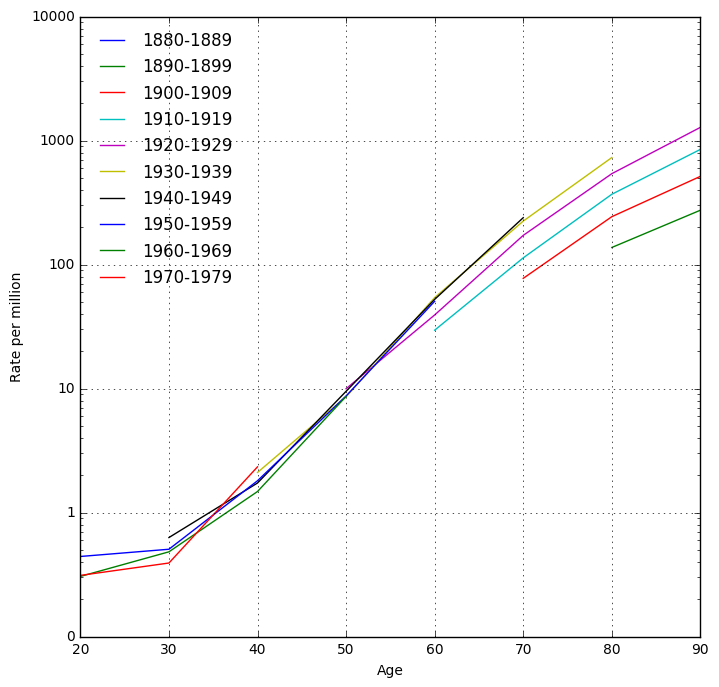

In [70]:
plot_cohort_age(df, mask['male-ipf-cohort'], '')

/home/drcjar/.virtualenvs/litsearch/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


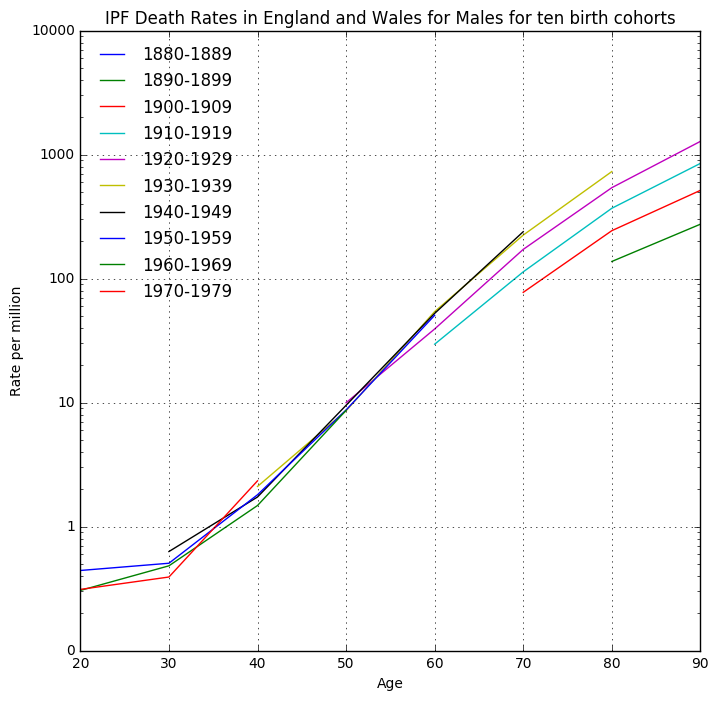

In [51]:
# black_and_white_mode() # winter bts doesn't support colour
# colour_edition()
plot_cohort_age(df, mask['male-ipf-cohort'], 'IPF Death Rates in England and Wales for Males for ten birth cohorts')


In [8]:
df[mask['male-asb-cohort']][df[mask['male-asb-cohort']].dob == 1889]

,Region,Agegroup,Deaths,Sex,Year,Cause,Population,2008 population,"Rate per 100,000 population",Estimated deaths age standardised to 2008 population,"Rate per 100,000 (standardised)",Agemidpoint,YearOfDeath,dob,birthcohort,Rate per million population
1066,WEST MIDLANDS,85+,1.0,Male,1979-01-01,Asbestosis,10000.0,36964.0,10.0,3.6964,10.0,90,1979,1889,1880-1889,100.0
1108,SOUTH EAST,85+,0.0,Male,1979-01-01,Asbestosis,44000.0,66390.0,0.0,0.0000,0.0,90,1979,1889,1880-1889,0.0


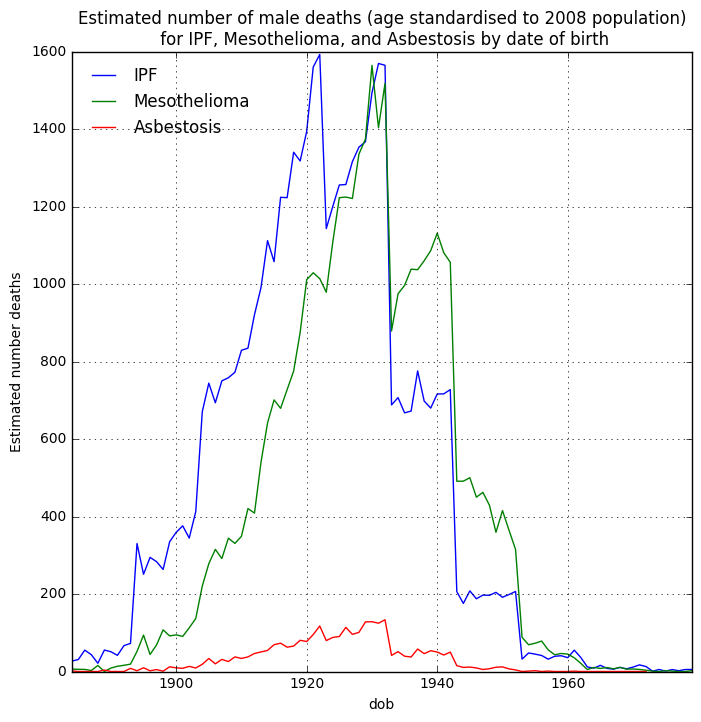

In [68]:
title = 'Estimated number of male deaths (age standardised to 2008 population)\n for IPF, Mesothelioma, and Asbestosis by date of birth'

mylabels = ['IPF', 'Mesothelioma', 'Asbestosis']

ax = df[mask['male-ipf-cohort']].groupby('dob')['Estimated deaths age standardised to 2008 population'].sum().plot(figsize=(8,8), title=title)
ax.set_ylabel("Estimated number deaths")

df[mask['male-meso-cohort']].groupby('dob')['Estimated deaths age standardised to 2008 population'].sum().plot(figsize=(8,8))
df[mask['male-asb-cohort']].groupby('dob')['Estimated deaths age standardised to 2008 population'].sum().plot(figsize=(8,8))

ax.grid(True)
ax.legend(labels=mylabels, loc='upper left', frameon=False)
ax

In [10]:
df[mask['male-ipf-cohort']].groupby('birthcohort')['Estimated deaths age standardised to 2008 population'].sum()

birthcohort
1880-1889      232.735995
1890-1899     1989.269598
1900-1909     5880.205446
1910-1919    10848.839033
1920-1929    13437.497804
1930-1939     9514.630969
1940-1949     3535.607271
1950-1959      874.420671
1960-1969      194.943686
1970-1979       65.542682
1980-1989             NaN
1990-1999             NaN
Name: Estimated deaths age standardised to 2008 population, dtype: float64

In [11]:
df[mask['male-meso-cohort']].groupby('birthcohort')['Estimated deaths age standardised to 2008 population'].median()

birthcohort
1880-1889     0.000000
1890-1899     0.000000
1900-1909     7.687729
1910-1919    14.511776
1920-1929    25.708832
1930-1939    24.371521
1940-1949     9.225448
1950-1959     1.000000
1960-1969     0.000000
1970-1979     0.000000
1980-1989          NaN
1990-1999          NaN
Name: Estimated deaths age standardised to 2008 population, dtype: float64

In [12]:
df[mask['male-asb-cohort']].groupby('birthcohort')['Estimated deaths age standardised to 2008 population'].median()

birthcohort
1880-1889    0.000000
1890-1899    0.000000
1900-1909    0.000000
1910-1919    1.244467
1920-1929    2.055834
1930-1939    1.175404
1940-1949    0.000000
1950-1959    0.000000
1960-1969    0.000000
1970-1979    0.000000
1980-1989         NaN
1990-1999         NaN
Name: Estimated deaths age standardised to 2008 population, dtype: float64

/home/drcjar/.virtualenvs/litsearch/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


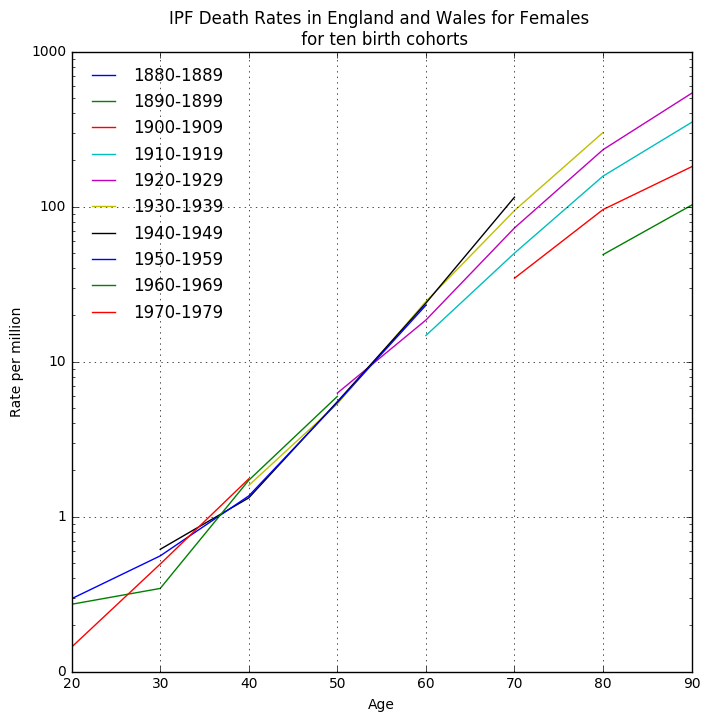

In [13]:
plot_cohort_age(df, mask['female-ipf-cohort'], 'IPF Death Rates in England and Wales for Females \n for ten birth cohorts')


/home/drcjar/.virtualenvs/litsearch/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


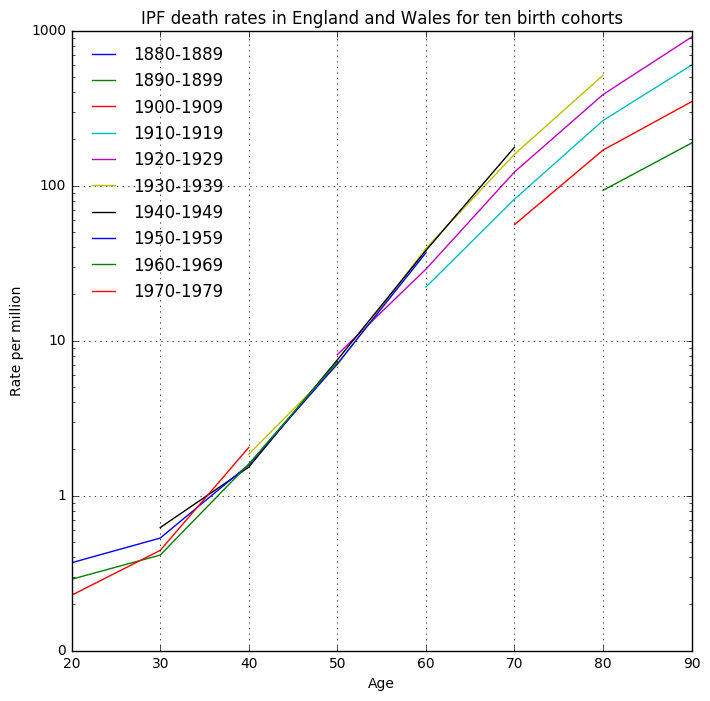

In [14]:
plot_cohort_age(df, mask['malefemale-ipf-cohort'], 'IPF death rates in England and Wales for ten birth cohorts')

/home/drcjar/.virtualenvs/litsearch/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


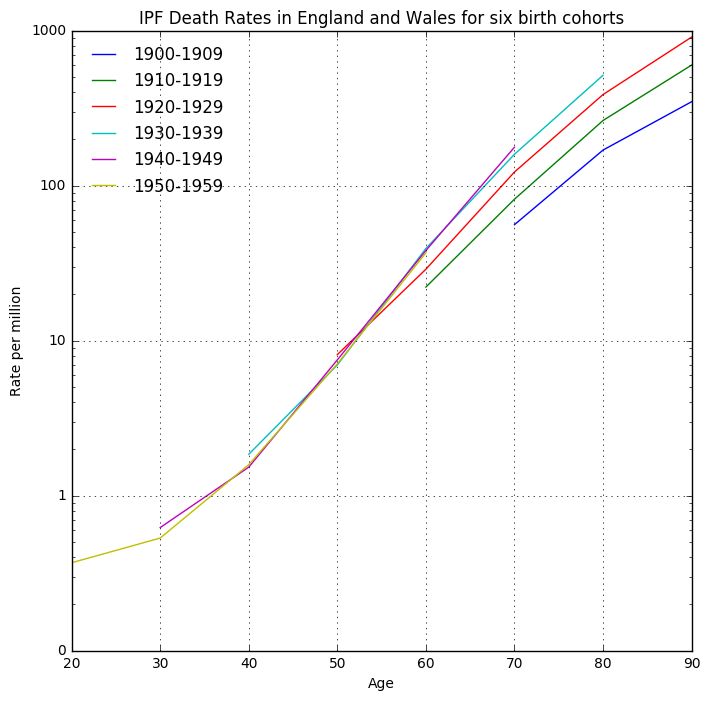

In [15]:
plot_cohort_age(df, mask['malefemale-ipf-cohort-1900-1960'], 'IPF Death Rates in England and Wales for six birth cohorts')


/home/drcjar/.virtualenvs/litsearch/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


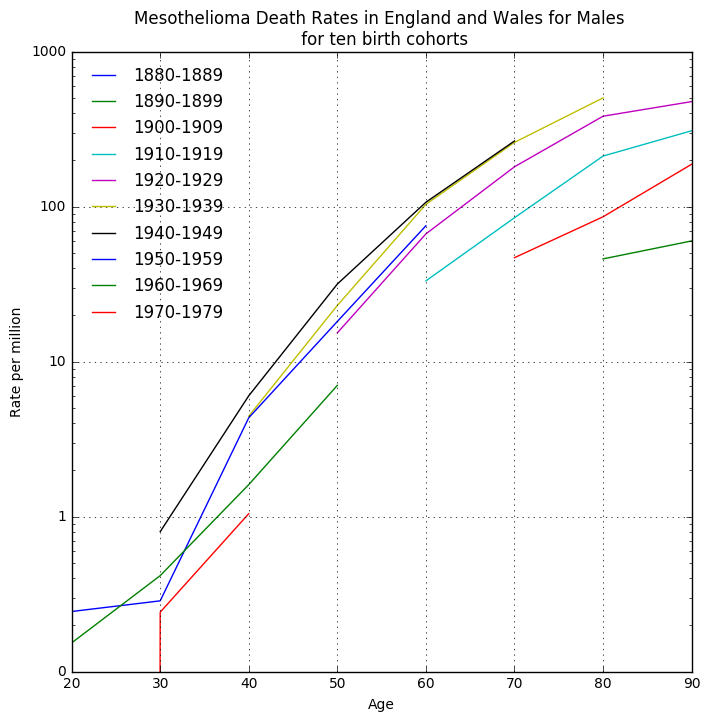

In [16]:
plot_cohort_age(df, mask['male-meso-cohort'], 'Mesothelioma Death Rates in England and Wales for Males \n for ten birth cohorts')

/home/drcjar/.virtualenvs/litsearch/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


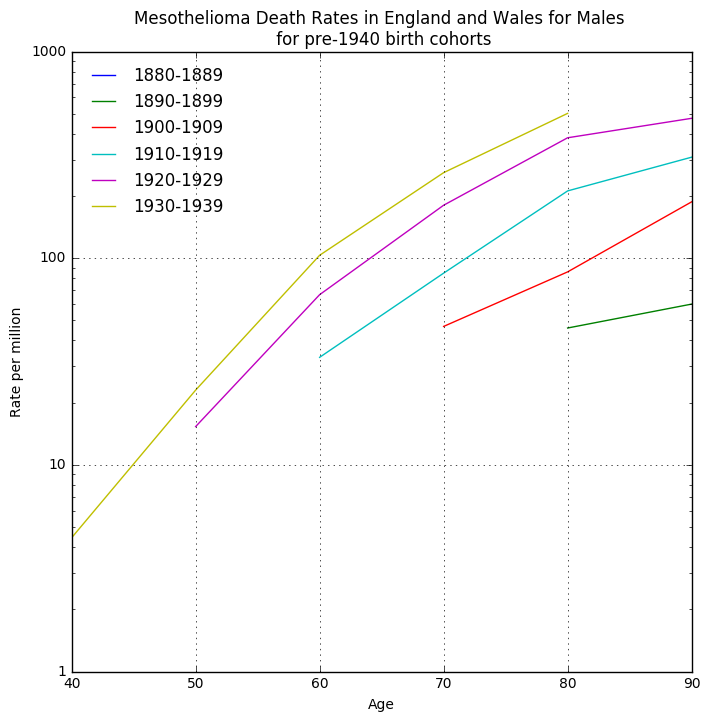

In [17]:
plot_cohort_age(df, mask['male-meso-cohort-pre-1940'], 'Mesothelioma Death Rates in England and Wales for Males \n for pre-1940 birth cohorts')

/home/drcjar/.virtualenvs/litsearch/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


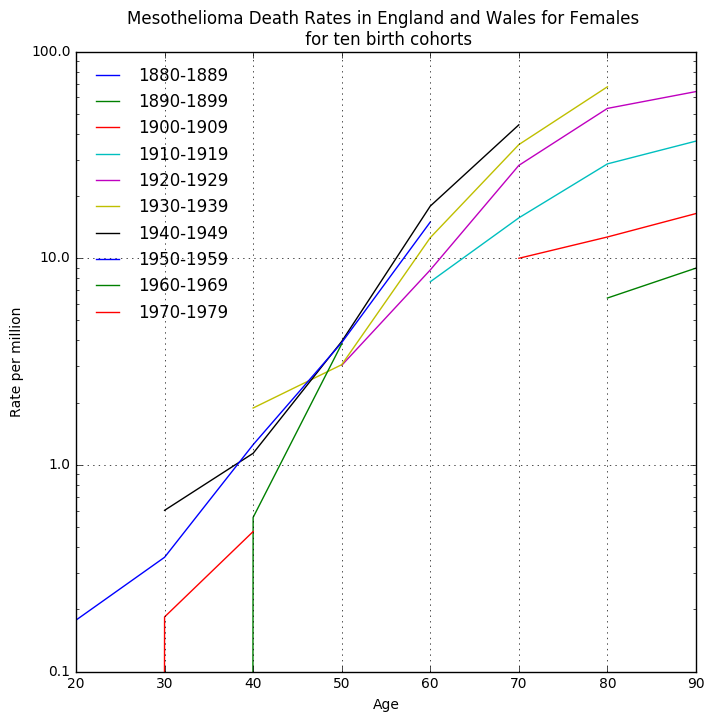

In [18]:
plot_cohort_age(df, mask['female-meso-cohort'], 'Mesothelioma Death Rates in England and Wales for Females \n for ten birth cohorts')

/home/drcjar/.virtualenvs/litsearch/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


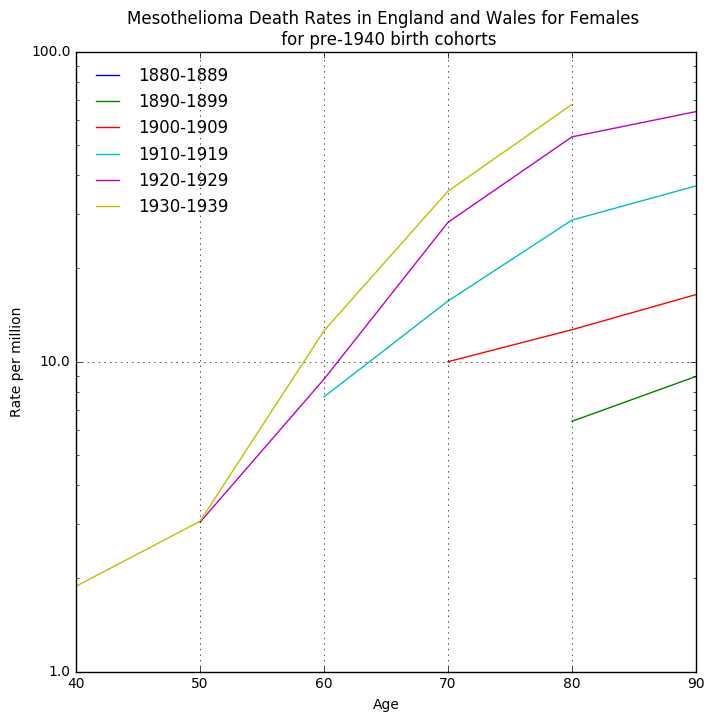

In [19]:
plot_cohort_age(df, mask['female-meso-cohort-pre-1940'], 'Mesothelioma Death Rates in England and Wales for Females \n for pre-1940 birth cohorts')

/home/drcjar/.virtualenvs/litsearch/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


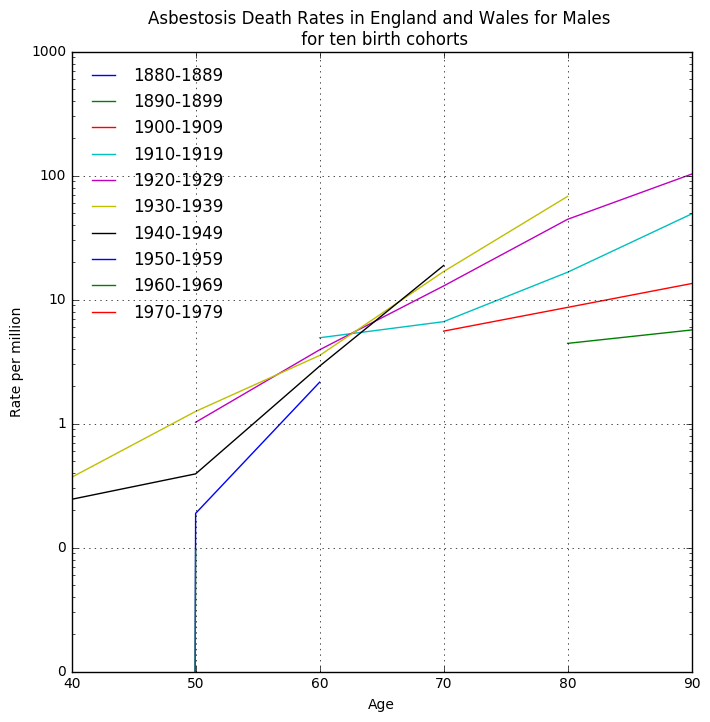

In [20]:
plot_cohort_age(df, mask['male-asb-cohort'], 'Asbestosis Death Rates in England and Wales for Males \n for ten birth cohorts')

/home/drcjar/.virtualenvs/litsearch/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


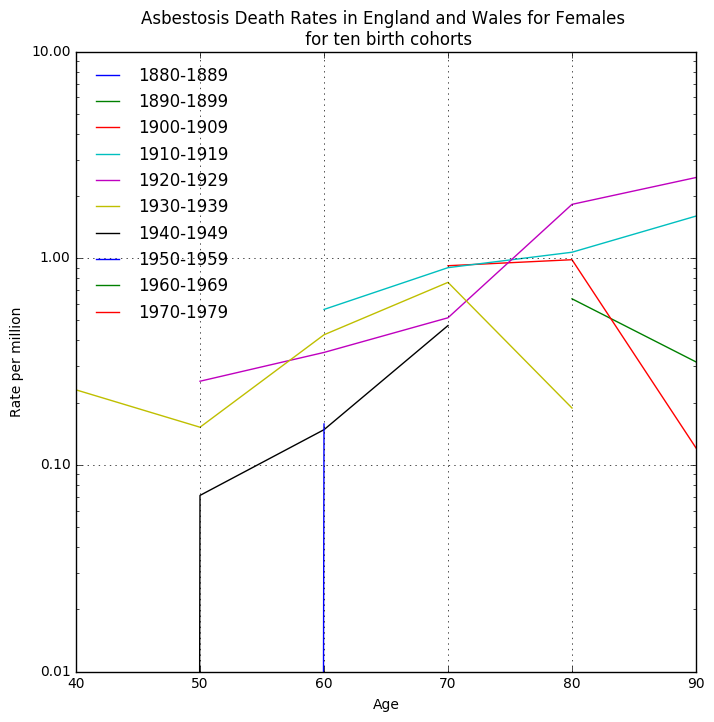

In [21]:
plot_cohort_age(df, mask['female-asb-cohort'], 'Asbestosis Death Rates in England and Wales for Females \n for ten birth cohorts')

In [22]:
# plot_cohort_age(df, mask['male-meso-cohort-ne'], 'Mesothelioma Mortality trends in England and Wales for Males \n by birth cohort \n for the North East')
# plot_cohort_age(df, mask['male-ipf-cohort-ne'], 'IPF Mortality trends in England and Wales for Males \n by birth cohort \n for the North East')

In [23]:
mask['male-ipf-cohort'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'IPF')")
mask['female-ipf-cohort'] = eval("(df['Sex'] == 'Female') & (df['Cause'] == 'IPF')")

In [24]:
df[mask['male-ipf-cohort']]['Rate per 100,000 population'].mean() / 5.8921637021400297

2.4253577304262102

In [25]:
df[mask['female-ipf-cohort']]['Rate per 100,000 population'].mean()

5.8921637021400297

In [26]:
df[df['Cause'] == 'IPF'].Deaths.sum()

67241.0

In [27]:
df[(df['Cause'] == 'IPF') & (df['Sex'] == 'Male') &  (df['YearOfDeath'] == 2012)].Deaths.sum() / df[(df['Cause'] == 'IPF') & (df['Sex'] == 'Female')  &  (df['YearOfDeath'] == 2012)].Deaths.sum()

1.5637319316688567

In [28]:
df[(df['Cause'] == 'IPF') & (df['Sex'] == 'Female')].Deaths.sum()

25992.0

In [29]:
df[df['Sex'] == 'Male']['2008 population'].sum() / df[df['Sex'] == 'Female']['2008 population'].sum()

0.94788785623091787

In [30]:
df[df.YearOfDeath == 2012]

,Region,Agegroup,Deaths,Sex,Year,Cause,Population,2008 population,"Rate per 100,000 population",Estimated deaths age standardised to 2008 population,"Rate per 100,000 (standardised)",Agemidpoint,YearOfDeath,dob,birthcohort,Rate per million population
9925,NORTH EAST,UNDER 25,0.0,Male,2012-01-01,IPF,401020.0,405899.0,0.000000,0.000000,0.000000,20,2012,1992,1990-1999,0.000000
9926,NORTH EAST,UNDER 25,0.0,Male,2012-01-01,All Mesothelioma,401020.0,405899.0,0.000000,0.000000,0.000000,20,2012,1992,1990-1999,0.000000
9927,NORTH EAST,25-34,0.0,Male,2012-01-01,IPF,158358.0,149126.0,0.000000,0.000000,0.000000,30,2012,1982,1980-1989,0.000000
9928,NORTH EAST,25-34,0.0,Male,2012-01-01,All Mesothelioma,158358.0,149126.0,0.000000,0.000000,0.000000,30,2012,1982,1980-1989,0.000000
9929,NORTH EAST,35-44,0.0,Male,2012-01-01,IPF,159441.0,176643.0,0.000000,0.000000,0.000000,40,2012,1972,1970-1979,0.000000
9930,NORTH EAST,35-44,1.0,Male,2012-01-01,All Mesothelioma,159441.0,176643.0,0.627191,1.107889,0.627191,40,2012,1972,1970-1979,6.271912
9931,NORTH EAST,45-54,1.0,Male,2012-01-01,IPF,186080.0,176934.0,0.537403,0.950849,0.537403,50,2012,1962,1960-1969,5.374033
9932,NORTH EAST,45-54,0.0,Male,2012-01-01,Asbestosis,186080.0,176934.0,0.000000,0.000000,0.000000,50,2012,1962,1960-1969,0.000000
9933,NORTH EAST,45-54,0.0,Male,2012-01-01,All Mesothelioma,186080.0,176934.0,0.000000,0.000000,0.000000,50,2012,1962,1960-1969,0.000000
9934,NORTH EAST,55-64,9.0,Male,2012-01-01,IPF,159793.0,158349.0,5.632287,8.918670,5.632287,60,2012,1952,1950-1959,56.322868


/home/drcjar/.virtualenvs/litsearch/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


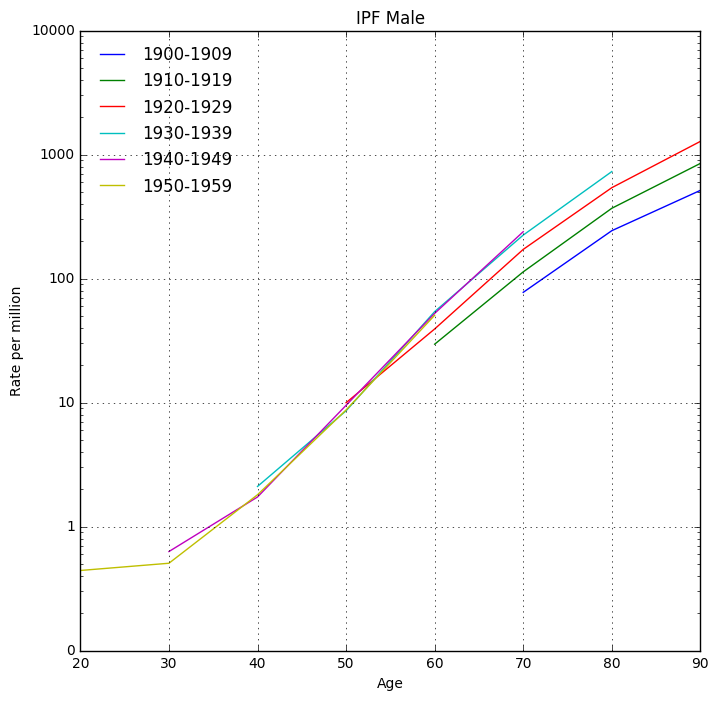

In [31]:
plot_cohort_age(df, mask['male-ipf-cohort-1900-1960'], 'IPF Male')


/home/drcjar/.virtualenvs/litsearch/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


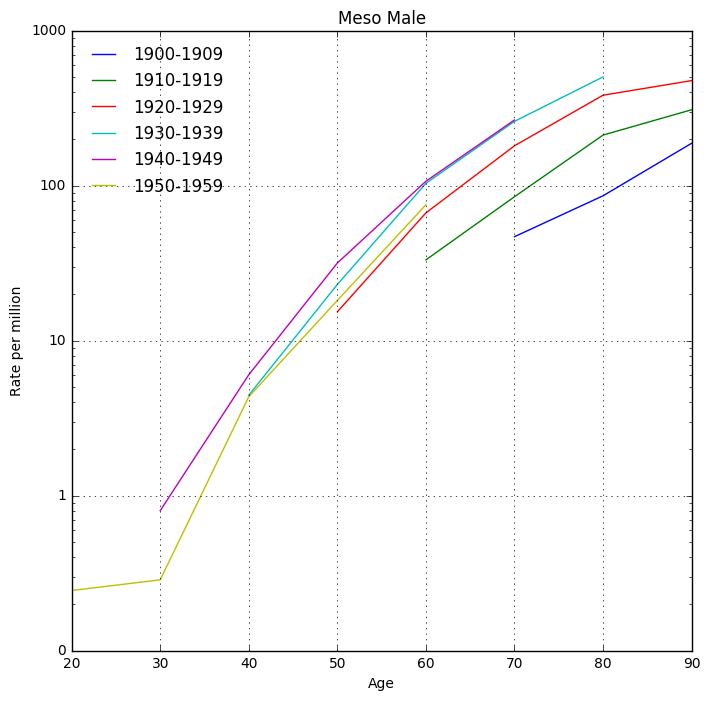

In [32]:
plot_cohort_age(df, mask['male-meso-cohort-1900-1960'], 'Meso Male')


/home/drcjar/.virtualenvs/litsearch/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


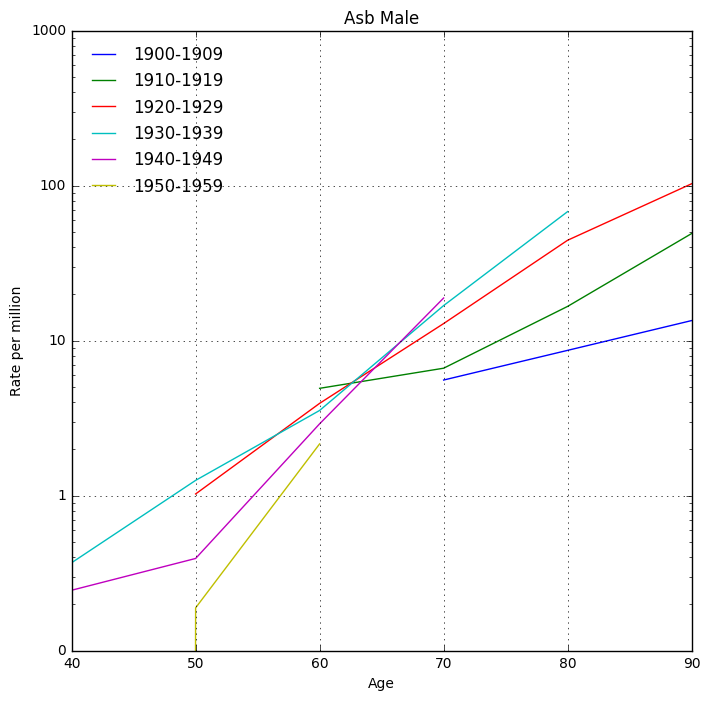

In [33]:
plot_cohort_age(df, mask['male-asb-cohort-1900-1960'], 'Asb Male')


/home/drcjar/.virtualenvs/litsearch/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


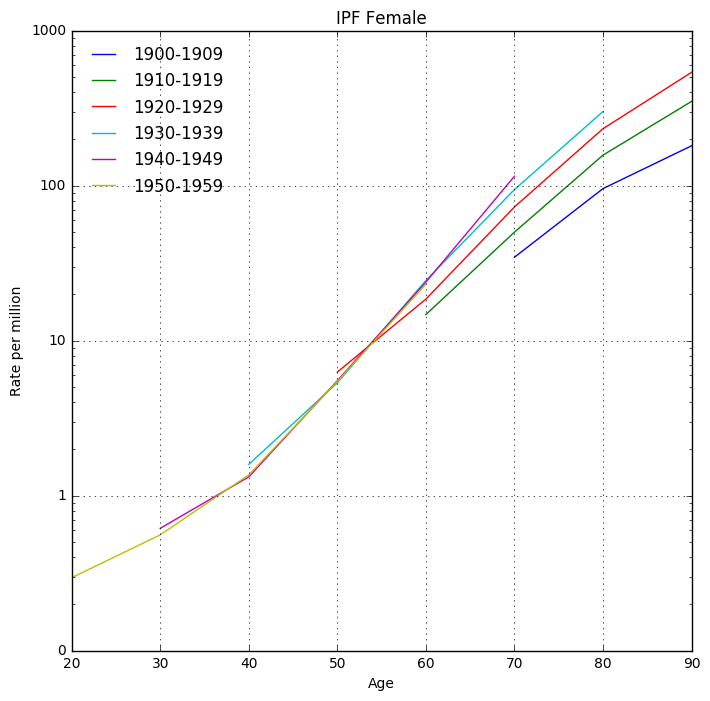

In [34]:
plot_cohort_age(df, mask['female-ipf-cohort-1900-1960'], 'IPF Female')


/home/drcjar/.virtualenvs/litsearch/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


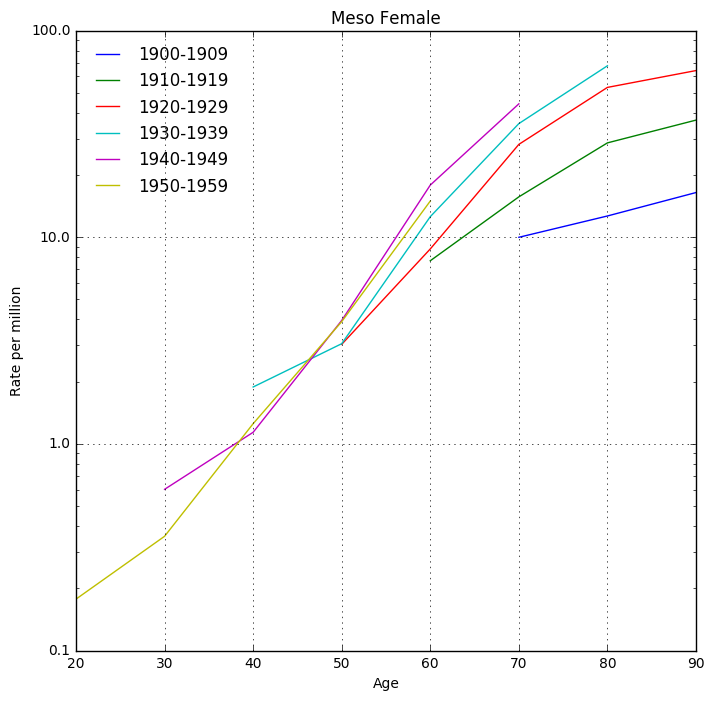

In [35]:
plot_cohort_age(df, mask['female-meso-cohort-1900-1960'], 'Meso Female')

/home/drcjar/.virtualenvs/litsearch/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


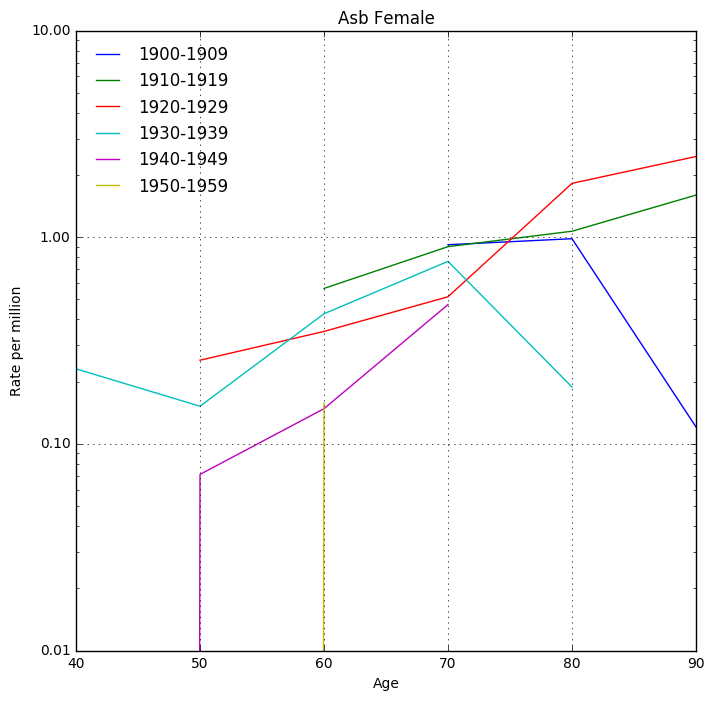

In [36]:
plot_cohort_age(df, mask['female-asb-cohort-1900-1960'], 'Asb Female')


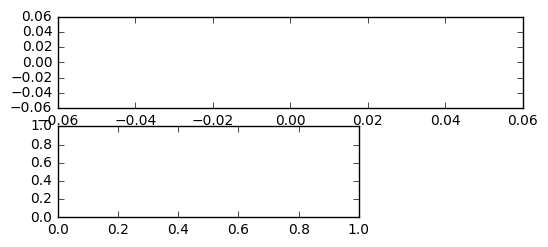

In [37]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 3)
ax1 = plt.subplot(gs[0, :])
ax1.plot()
ax2 = plt.subplot(gs[1,:-1])

/home/drcjar/.virtualenvs/litsearch/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


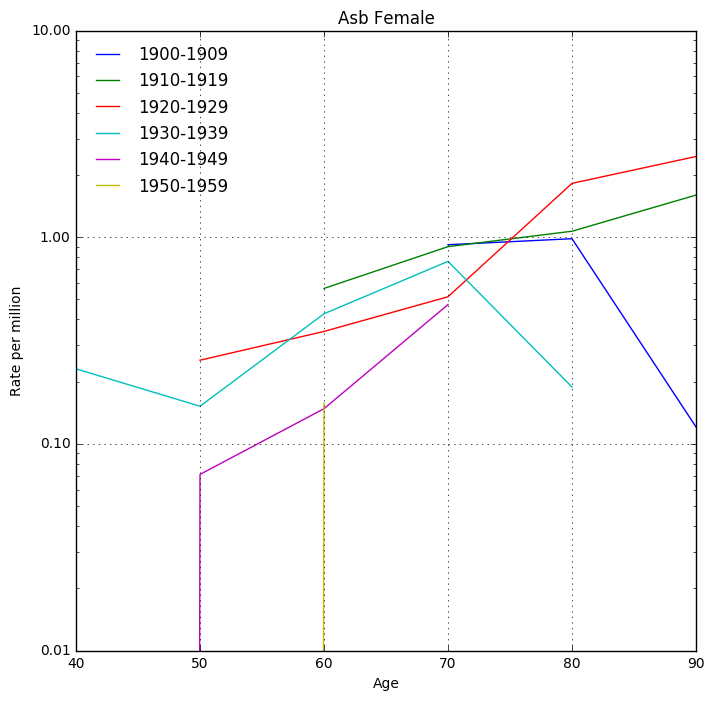

In [38]:
jam = plot_cohort_age(df, mask['female-asb-cohort-1900-1960'], 'Asb Female')

/home/drcjar/.virtualenvs/litsearch/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


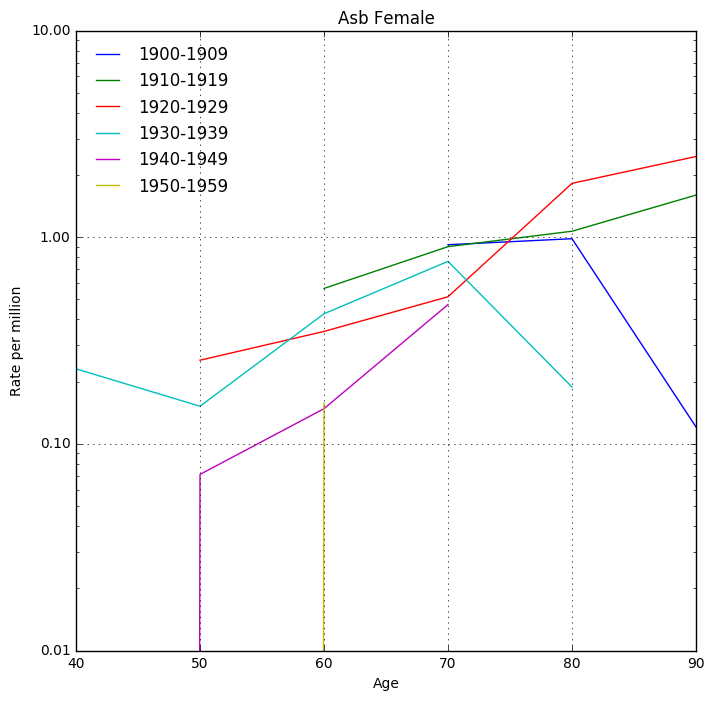

In [39]:
jam = plot_cohort_age(df, mask['female-asb-cohort-1900-1960'], 'Asb Female')